<a href="https://colab.research.google.com/github/hyehyunseo/ESAA_OB/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[ 미니 프로젝트 (1) ]**
### **주제 : Medical Cost Personal Datasets**

**<변수 설명>**

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# **1. 데이터 살펴보기**

### **1) 데이터 불러오기**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 나눔 폰트 설치 / 한글 깨짐 방지 , 런타임 다시 시작하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') #matplotlib 한글 깨짐 방지
import seaborn as sns
import plotly.express as px
import os

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/ESAA/OB/project/mproject1/data/insurance.csv')

### **2) 데이터 확인**

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
data.shape

(1338, 7)

=> 1338개의 관측치를 가지며 6개의 feature 변수, 1개의 target 변수가 있음

In [8]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


=> 데이터에 결측치가 없으며, (sex, smoker, region)은 범주형 변수임

In [10]:
# 데이터의 기술 통계량 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

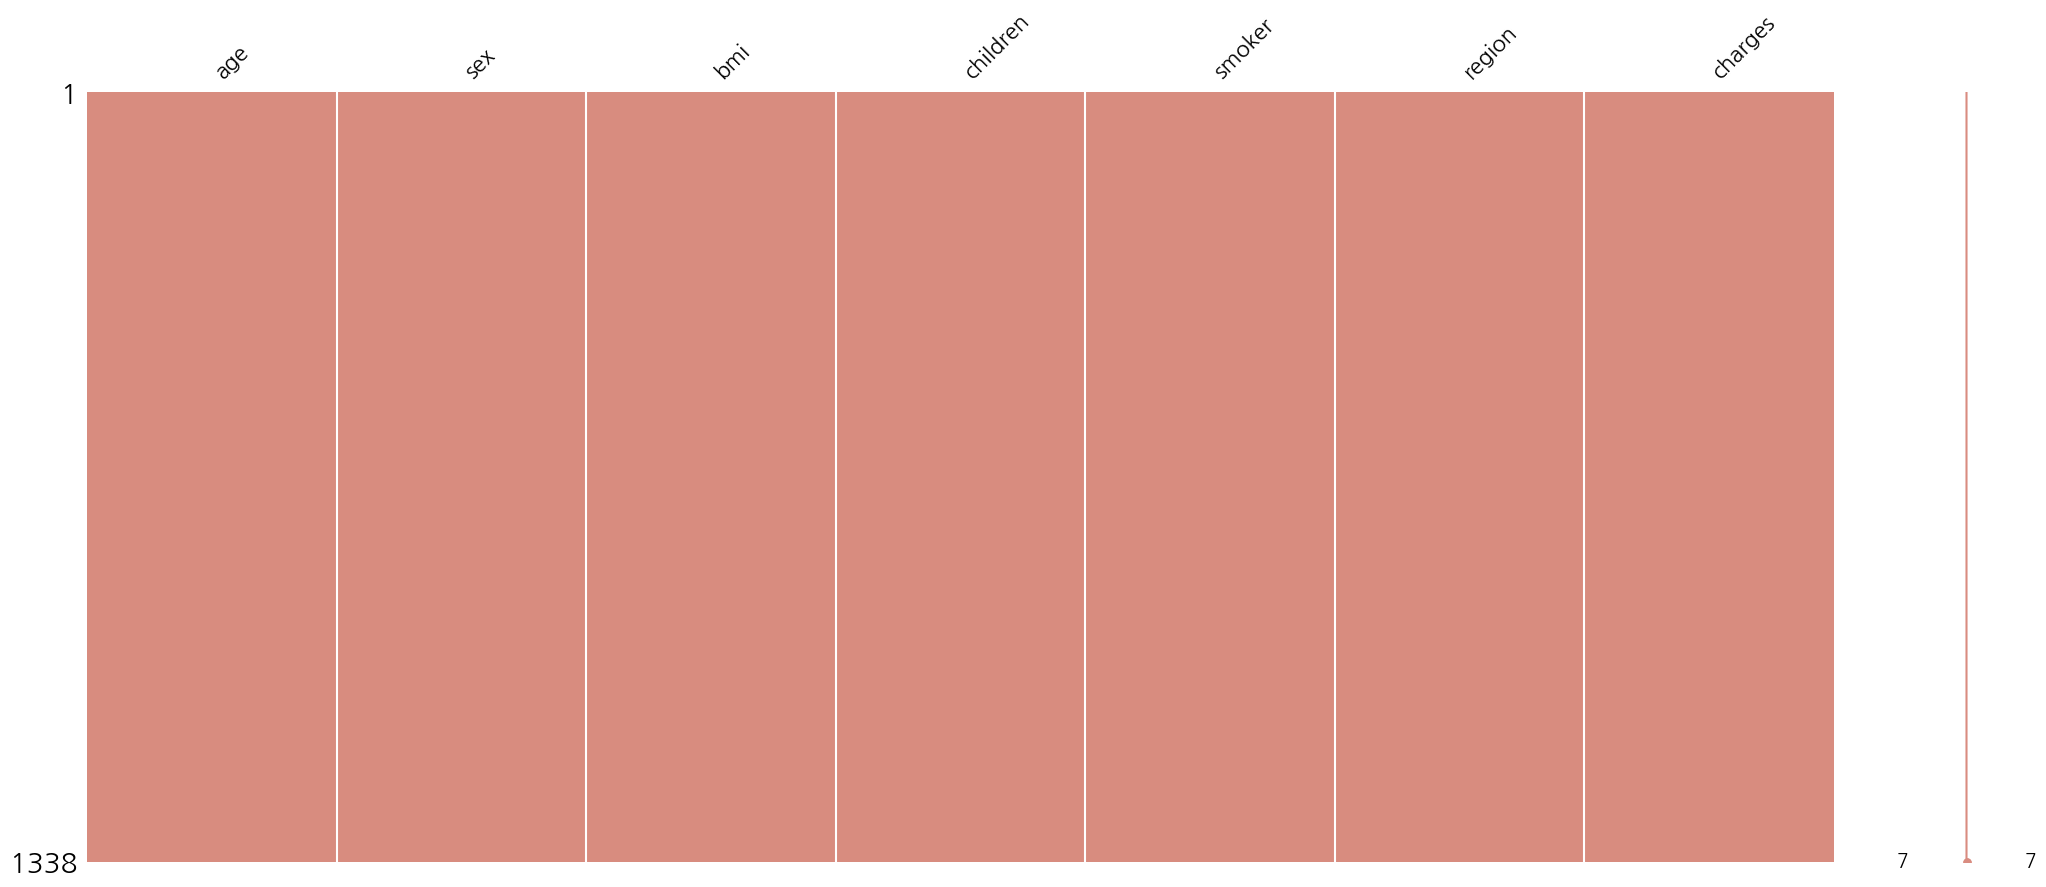

In [12]:
# 데이터의 결측치 확인
import missingno as mino
mino.matrix(data, color=(0.85, 0.55, 0.5))

# **2. Exploratory Data Analysis (EDA)**

## **1. feature 변수**
### **1) Age 변수**

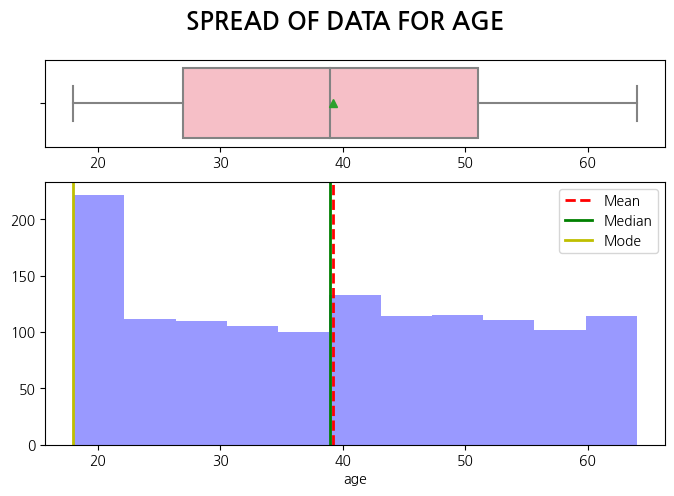

In [50]:
# (1) age의 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=data['age'].mean()
median=data['age'].median()
mode=data['age'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR AGE"  , fontsize=18, fontweight='bold')
sns.boxplot(x=data['age'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(data['age'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [54]:
# (2) age와 charges의 산점도
px.scatter(data_frame = data, x = 'age', y = 'charges', color = 'age', template = 'ggplot2')

### **2) bmi 변수**

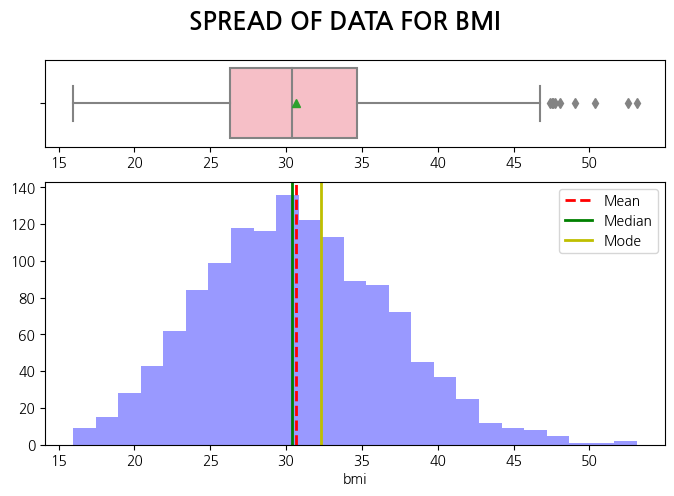

In [55]:
# (1) bmi 변수 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=data['bmi'].mean()
median=data['bmi'].median()
mode=data['bmi'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR BMI"  , fontsize=18, fontweight='bold')
sns.boxplot(x=data['bmi'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(data['bmi'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [59]:
# (2) bmi와 charges의 산점도
px.scatter(data_frame = data, x = 'bmi', y = 'charges', color = 'bmi', template = 'ggplot2')

In [61]:
# (3) bmi와 charges의 산점도 + 점의 색은 smoker 여부로 구분
px.scatter(data_frame = data, x = 'bmi', y = 'charges', color = 'smoker', template = 'ggplot2')

### **3) children 변수**

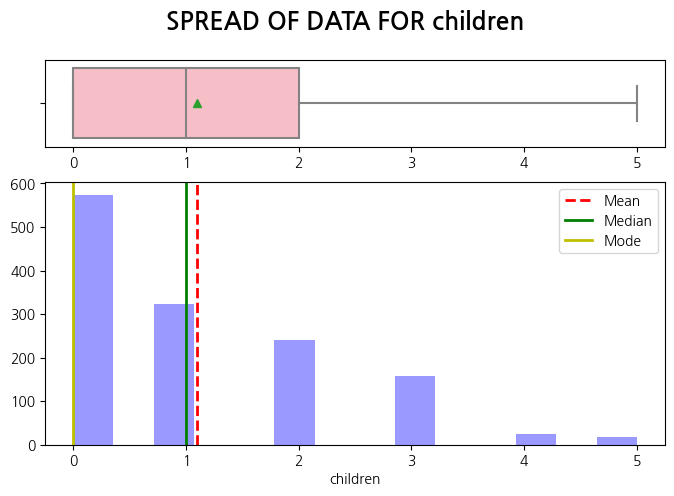

In [62]:
# (1) children 변수 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=data['children'].mean()
median=data['children'].median()
mode=data['children'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR children"  , fontsize=18, fontweight='bold')
sns.boxplot(x=data['children'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(data['children'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [63]:
# (2) childern과 charges의 산점도
px.scatter(data_frame = data, x = 'children', y = 'charges', color = 'children', template = 'ggplot2')

In [66]:
# (3) bmi와 charges의 그래프 + 점의 색은 smoker 여부로 구분
px.box(data_frame = data, x = 'children', y = 'charges', color = 'smoker', template = 'ggplot2')

### **4) sex 변수**

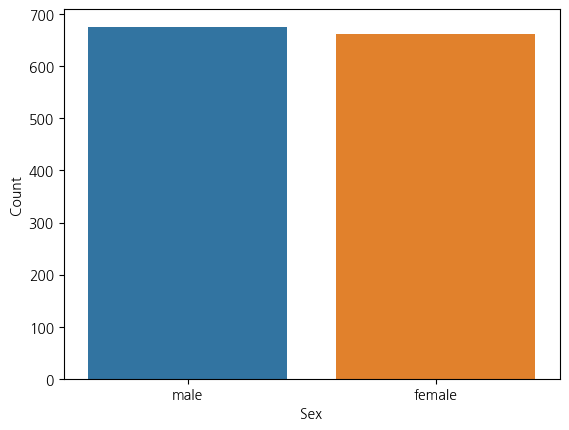

In [77]:
# (1) sex 변수 분포 확인하기
data_sex = data['sex'].value_counts()
sns.barplot(x=data_sex.index, y=data_sex.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [78]:
# (2) sex와 charges
px.box(x = 'sex', y = 'charges', data_frame = data, template = 'ggplot2')

### **5) smoker 변수**

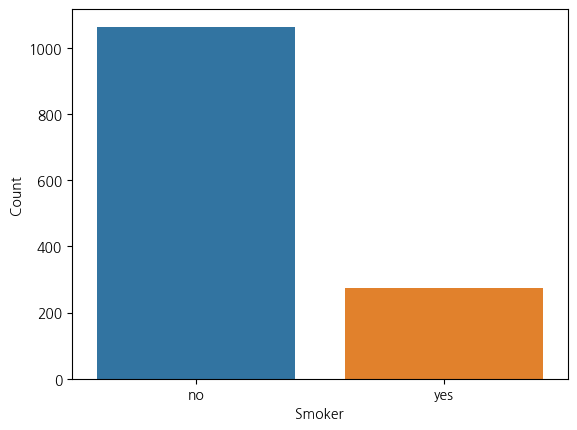

In [79]:
# (1) smoker 변수 분포 확인하기
data_smoke = data['smoker'].value_counts()
sns.barplot(x=data_smoke.index, y=data_smoke.values)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

In [80]:
# (2) smoker와 charges
px.box(x = 'smoker', y = 'charges', data_frame = data, template = 'ggplot2')

### **6) region 변수**

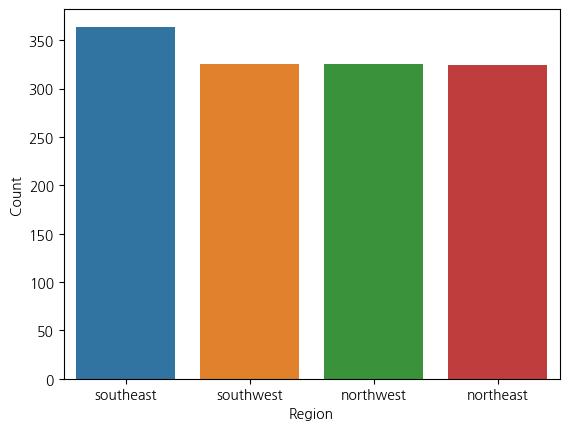

In [81]:
# (1) region 변수 분포 확인하기
data_region = data['region'].value_counts()
sns.barplot(x=data_region.index, y=data_region.values)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [82]:
# (2) smoker와 charges
px.box(x = 'region', y = 'charges', data_frame = data, template = 'ggplot2')

## **2. target 변수**
### **1) charges 변수**

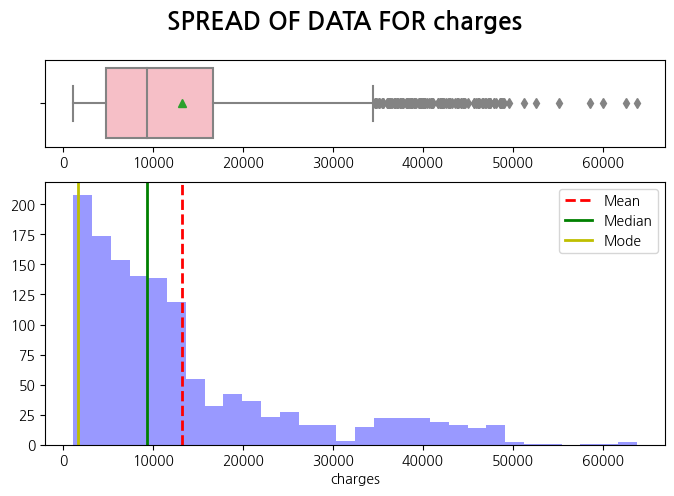

In [84]:
# (1) charges 변수 분포 확인하기
fig,(ax_box, ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))

mean=data['charges'].mean()
median=data['charges'].median()
mode=data['charges'].mode().tolist()[0]

# box plot 그리기
fig.suptitle("SPREAD OF DATA FOR charges"  , fontsize=18, fontweight='bold')
sns.boxplot(x=data['charges'], showmeans=True, orient='h', color="lightpink" ,ax=ax_box)
ax_box.set(xlabel='')

# distribution 그리기
sns.distplot(data['charges'], kde=False, color='blue', ax=ax_dis)
ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

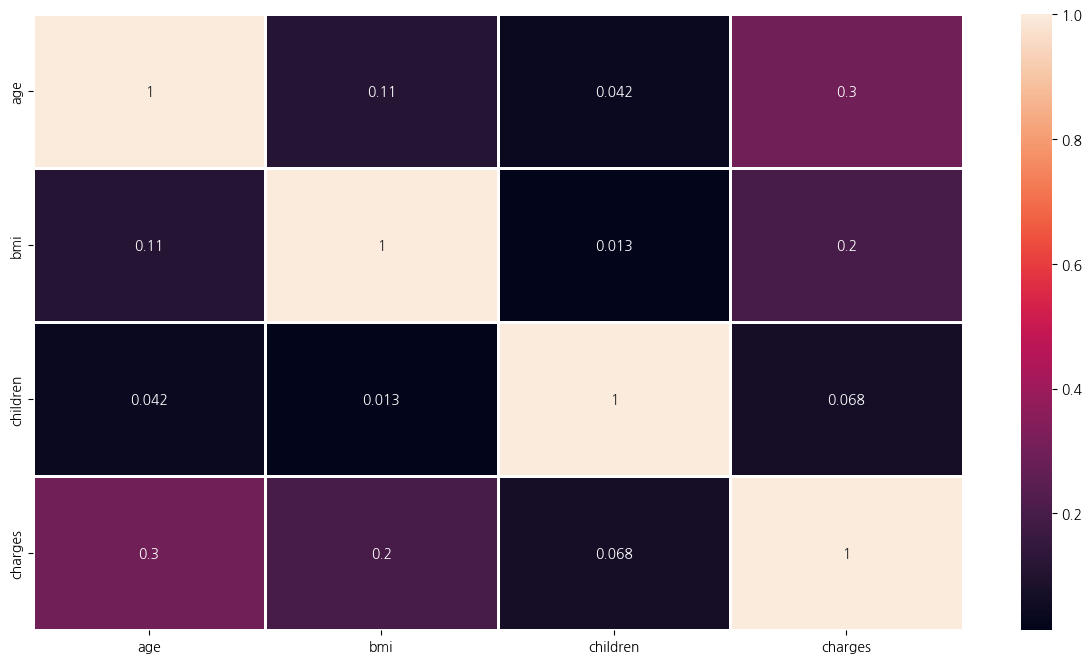

In [14]:
# (2) charges 변수와 age, bmi, children 변수
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(), annot = True, linewidths = 1)
plt.show()

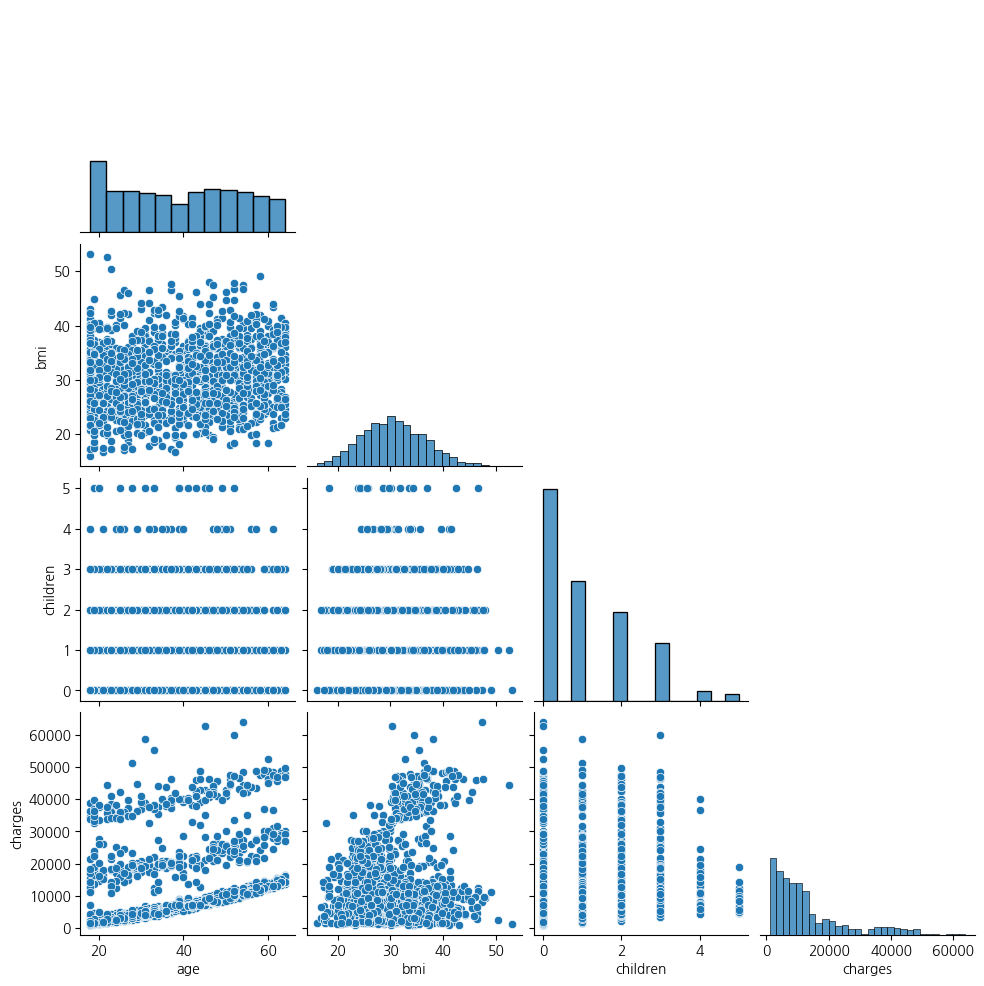

In [83]:
# (3) charges 변수와 age, bmi, children 변수
sns.pairplot(data=data , corner=True)
plt.show()

# **3. 데이터 전처리**

### **1) data scailing**

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['age', 'bmi', 'children']
data[columns] = scaler.fit_transform(data[columns])

In [88]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,16884.92400
1,-1.509965,male,0.509621,-0.078767,no,southeast,1725.55230
2,-0.797954,male,0.383307,1.580926,no,southeast,4449.46200
3,-0.441948,male,-1.305531,-0.908614,no,northwest,21984.47061
4,-0.513149,male,-0.292556,-0.908614,no,northwest,3866.85520


### **2) 범주형 변수**

In [89]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])

In [90]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1725.55230,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,4449.46200,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,21984.47061,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,3866.85520,0,1,1,0,0,1,0,0


###  **3) 데이터 분리**

In [91]:
X = data.drop(['charges'], axis=1)
y = data['charges']

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)